In [3]:
from sklearn import preprocessing
from sklearn import model_selection

import evopipe
import steps
import warnings

from sklearn.model_selection import train_test_split
from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
digits = datasets.load_digits()
train_X, test_X, train_Y, test_Y = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 0)

params = steps.get_params(len(train_X[0]))

In [2]:
print("Format:")
print("------------")
print("Classifier")
print("score")
print("cross-validation score")
print("GridSearch score")
print("------------")
print()

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for name, cls in steps.clfs.items():
        classif = cls()
        print(classif.__class__.__name__)
        classif.fit(train_X, train_Y)
        print(classif.score(test_X, test_Y))
        print(model_selection.cross_val_score(classif, test_X, test_Y).mean())
        
        pipe_params = params[name]
        gs = model_selection.GridSearchCV(classif, pipe_params, n_jobs=-1, verbose=5)
        gs.fit(train_X, train_Y)
        
        print(gs.best_params_)
        print(gs.score(test_X, test_Y))
        print()

Format:
------------
Classifier
score
cross-validation score
GridSearch score
------------

SVC


NameError: name 'train_X' is not defined

In [19]:
clf = evopipe.EvoPipeClassifier(steps.preproc, steps.clfs, params)
clf.fit(train_X, train_Y, test_X, test_Y)

score = clf.score(test_X, test_Y)
print("\nBest pipeline test score: {}\n".format(score))

best_pipes = clf.best_pipelines()

for pipe in best_pipes:
    pipe.fit(train_X, train_Y)
    score = pipe.score(test_X, test_Y)
    
    pipe_named_steps = []
    for key, val in pipe.steps:
        pipe_named_steps.append(key)       
    print("Score: {}, Pipe: {}".format(score, pipe_named_steps))

C:\Anaconda\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'PipeFitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Anaconda\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)



Gen 6:

Hall of fame:
[('MLP', {'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.01, 'learning_rate': 'invscaling', 'tol': 0.0001, 'max_iter': 200, 'learning_rate_init': 0.01, 'power_t': 2, 'momentum': 0.1, 'hidden_layer_sizes': (20,)})]
[('kBest', {'k': 64}), ('PAC', {'loss': 'squared_hinge', 'C': 0.5})]
[('SGD', {'penalty': 'elasticnet', 'loss': 'hinge', 'n_iter': 5, 'alpha': 0.0001, 'l1_ratio': 0.5, 'epsilon': 0.5, 'learning_rate': 'optimal', 'eta0': 0.01, 'power_t': 0.5})]
[('PAC', {'loss': 'squared_hinge', 'C': 0.5})]
[('kBest', {'k': 64}), ('SGD', {'penalty': 'elasticnet', 'loss': 'hinge', 'n_iter': 5, 'alpha': 0.0001, 'l1_ratio': 0.5, 'epsilon': 0.5, 'learning_rate': 'optimal', 'eta0': 0.01, 'power_t': 0.5})]

Gen 11:

Hall of fame:
[('MLP', {'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.01, 'learning_rate': 'invscaling', 'tol': 0.0001, 'max_iter': 200, 'learning_rate_init': 0.01, 'power_t': 2, 'momentum': 0.1, 'hidden_layer_sizes': (20,)})]
[('kBest', {'k': 64}), ('PA

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)



Best pipeline test score: 0.9466666666666667



C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Score: 0.9444444444444444, Pipe: ['sgdclassifier']


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Score: 0.9422222222222222, Pipe: ['sgdclassifier']
Score: 0.9622222222222222, Pipe: ['mlpclassifier']


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Score: 0.9444444444444444, Pipe: ['sgdclassifier']
Score: 0.9488888888888889, Pipe: ['passiveaggressiveclassifier']


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


   	                    fitness                     	                   train_test                   
   	------------------------------------------------	------------------------------------------------
gen	gen	avg     	min     	max     	gen	avg     	min     	max     
0  	   	0.178628	0       	0.959231	   	0.176148	0       	0.96    
1  	   	0.378838	0       	0.959231	   	0.372741	0       	0.96    
2  	   	0.695521	0       	0.959231	   	0.673778	0       	0.96    
3  	   	0.860574	0       	0.959231	   	0.845185	0       	0.96    
4  	   	0.939956	0.859638	0.959231	   	0.943259	0.835556	0.96    
5  	   	0.947567	0.933201	0.949693	   	0.945111	0.915556	0.955556
6  	   	0.948487	0.947997	0.951137	   	0.944148	0.937778	0.951111
7  	   	0.948529	0.942866	0.951137	   	0.942667	0.937778	0.951111
8  	   	0.948512	0.943552	0.951137	   	0.941481	0.937778	0.951111
9  	   	0.947997	0.940753	0.951137	   	0.938963	0.924444	0.951111
10 	   	0.948766	0.940753	0.951137	   	0.940593	0.924444	0.951111
11 	

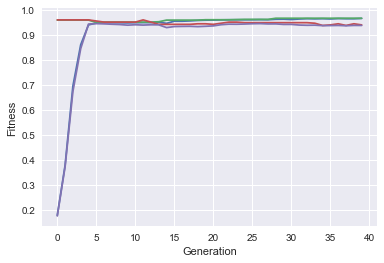

In [20]:
print(clf.logbook)

gen = clf.logbook.select("gen")
avgs, mins, maxs, vars = clf.logbook.chapters["fitness"].select("avg", "min", "max", "var")
avgs_tt, mins_tt, maxs_tt, vars_tt = clf.logbook.chapters["train_test"].select("avg", "min", "max", "var")

sns.set()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(gen, avgs, label='Average')
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")

ax1.plot(gen, maxs, label='Maximum')

ax1.plot(gen, maxs_tt, label='Maximum test')
ax1.plot(gen, avgs_tt, label='Average test')

plt.show()